In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
adata = sc.read('./data/Ketamine_Single_Cell/Ketamine_full_scran_nb_hvg_full_analysis_final.h5ad')

In [3]:
adata_full = sc.read('./data/Ketamine_Single_Cell/Ketamine_full_scran_nb_full_analysis_final.h5ad')

In [4]:
plt.rcParams['figure.dpi'] = 600
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']

# QC

# UMAPS

/app/python37/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Text(0.5, 1.0, 'UMAP')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


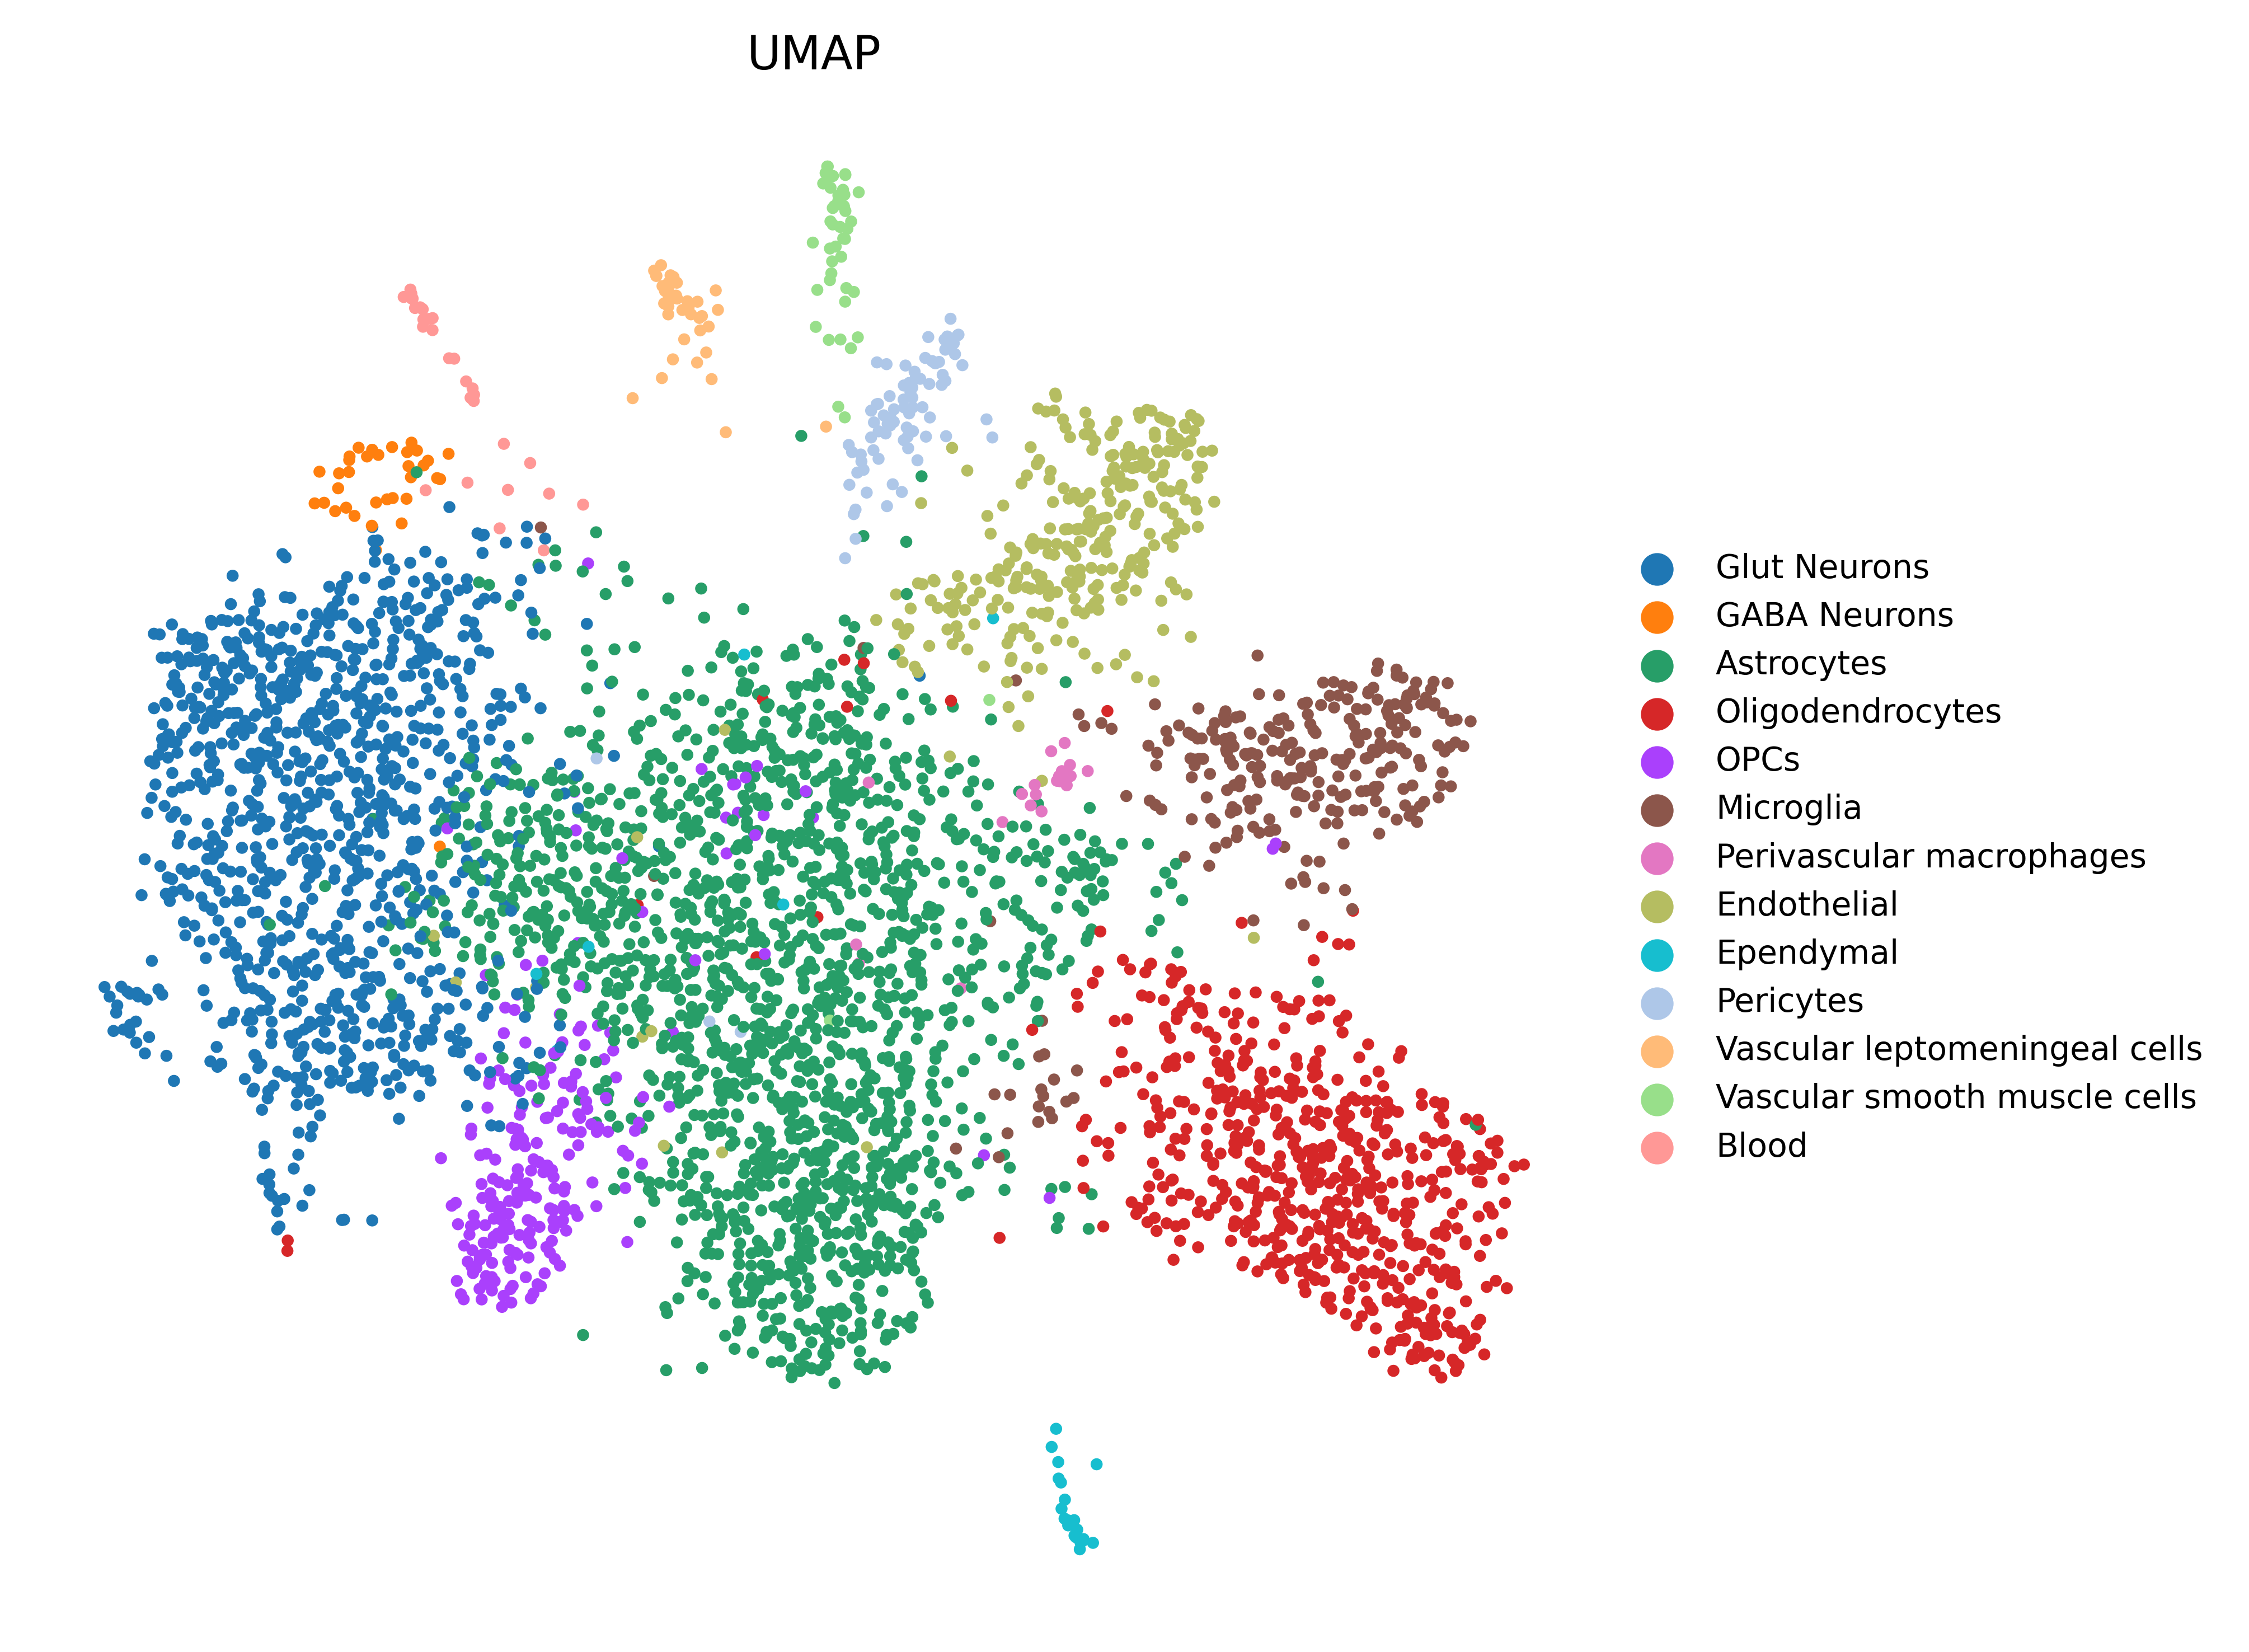

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sc.pl.umap(
    adata[~adata.obs.louvain_final.str.contains('Unknown')],
    color='louvain_final',
    frameon=False,
    show=False,
    ax=ax
)
sns.despine()
ax.set_title('UMAP')

Text(0.5, 1.0, 'TSNE')

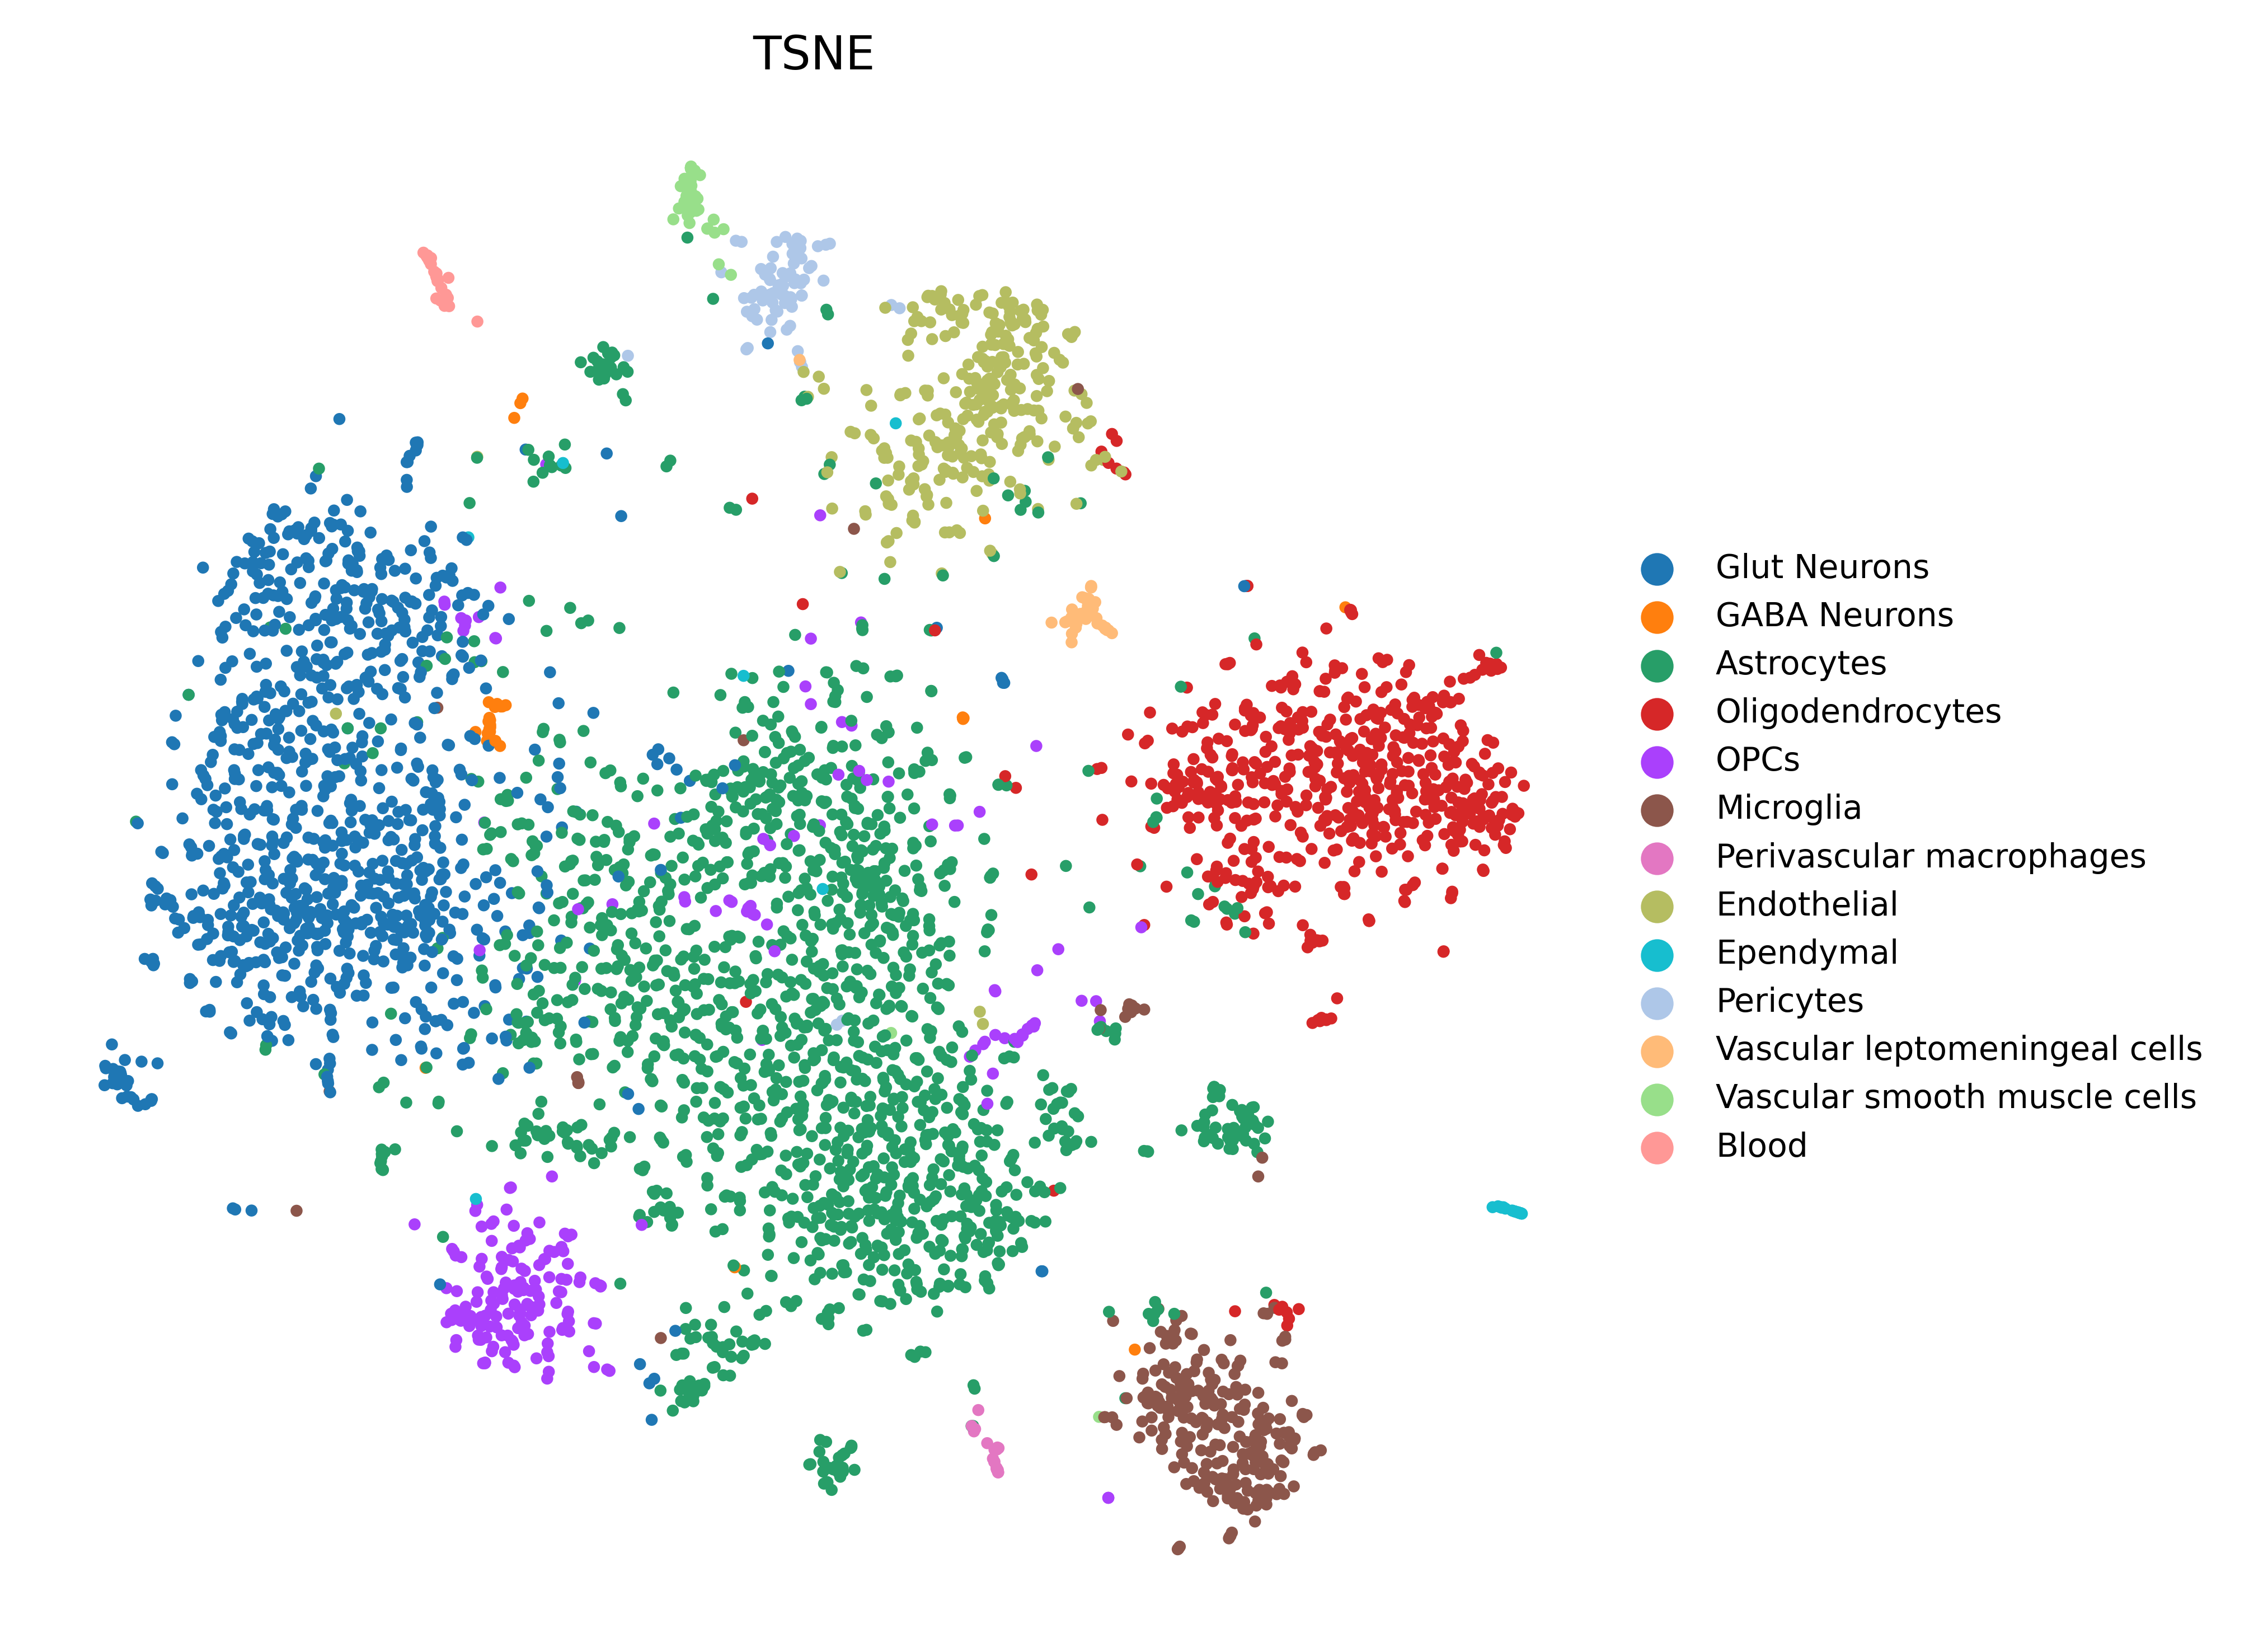

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sc.pl.tsne(
    adata[~adata.obs.louvain_final.str.contains('Unknown')],
    color='louvain_final',
    frameon=False,
    show=False,
    ax=ax
)
sns.despine()
ax.set_title('TSNE')

In [7]:
adata.obs['condition_cat'] = ['Ketamine' if i else 'Saline' for i in adata.obs.condition.values]
adata.obs.condition_cat = adata.obs.condition_cat.astype('category')
adata.obs.condition_cat = adata.obs.condition_cat.cat.reorder_categories(['Saline', 'Ketamine'])

Trying to set attribute `.uns` of view, copying.


Text(0.5, 1.0, 'UMAP')

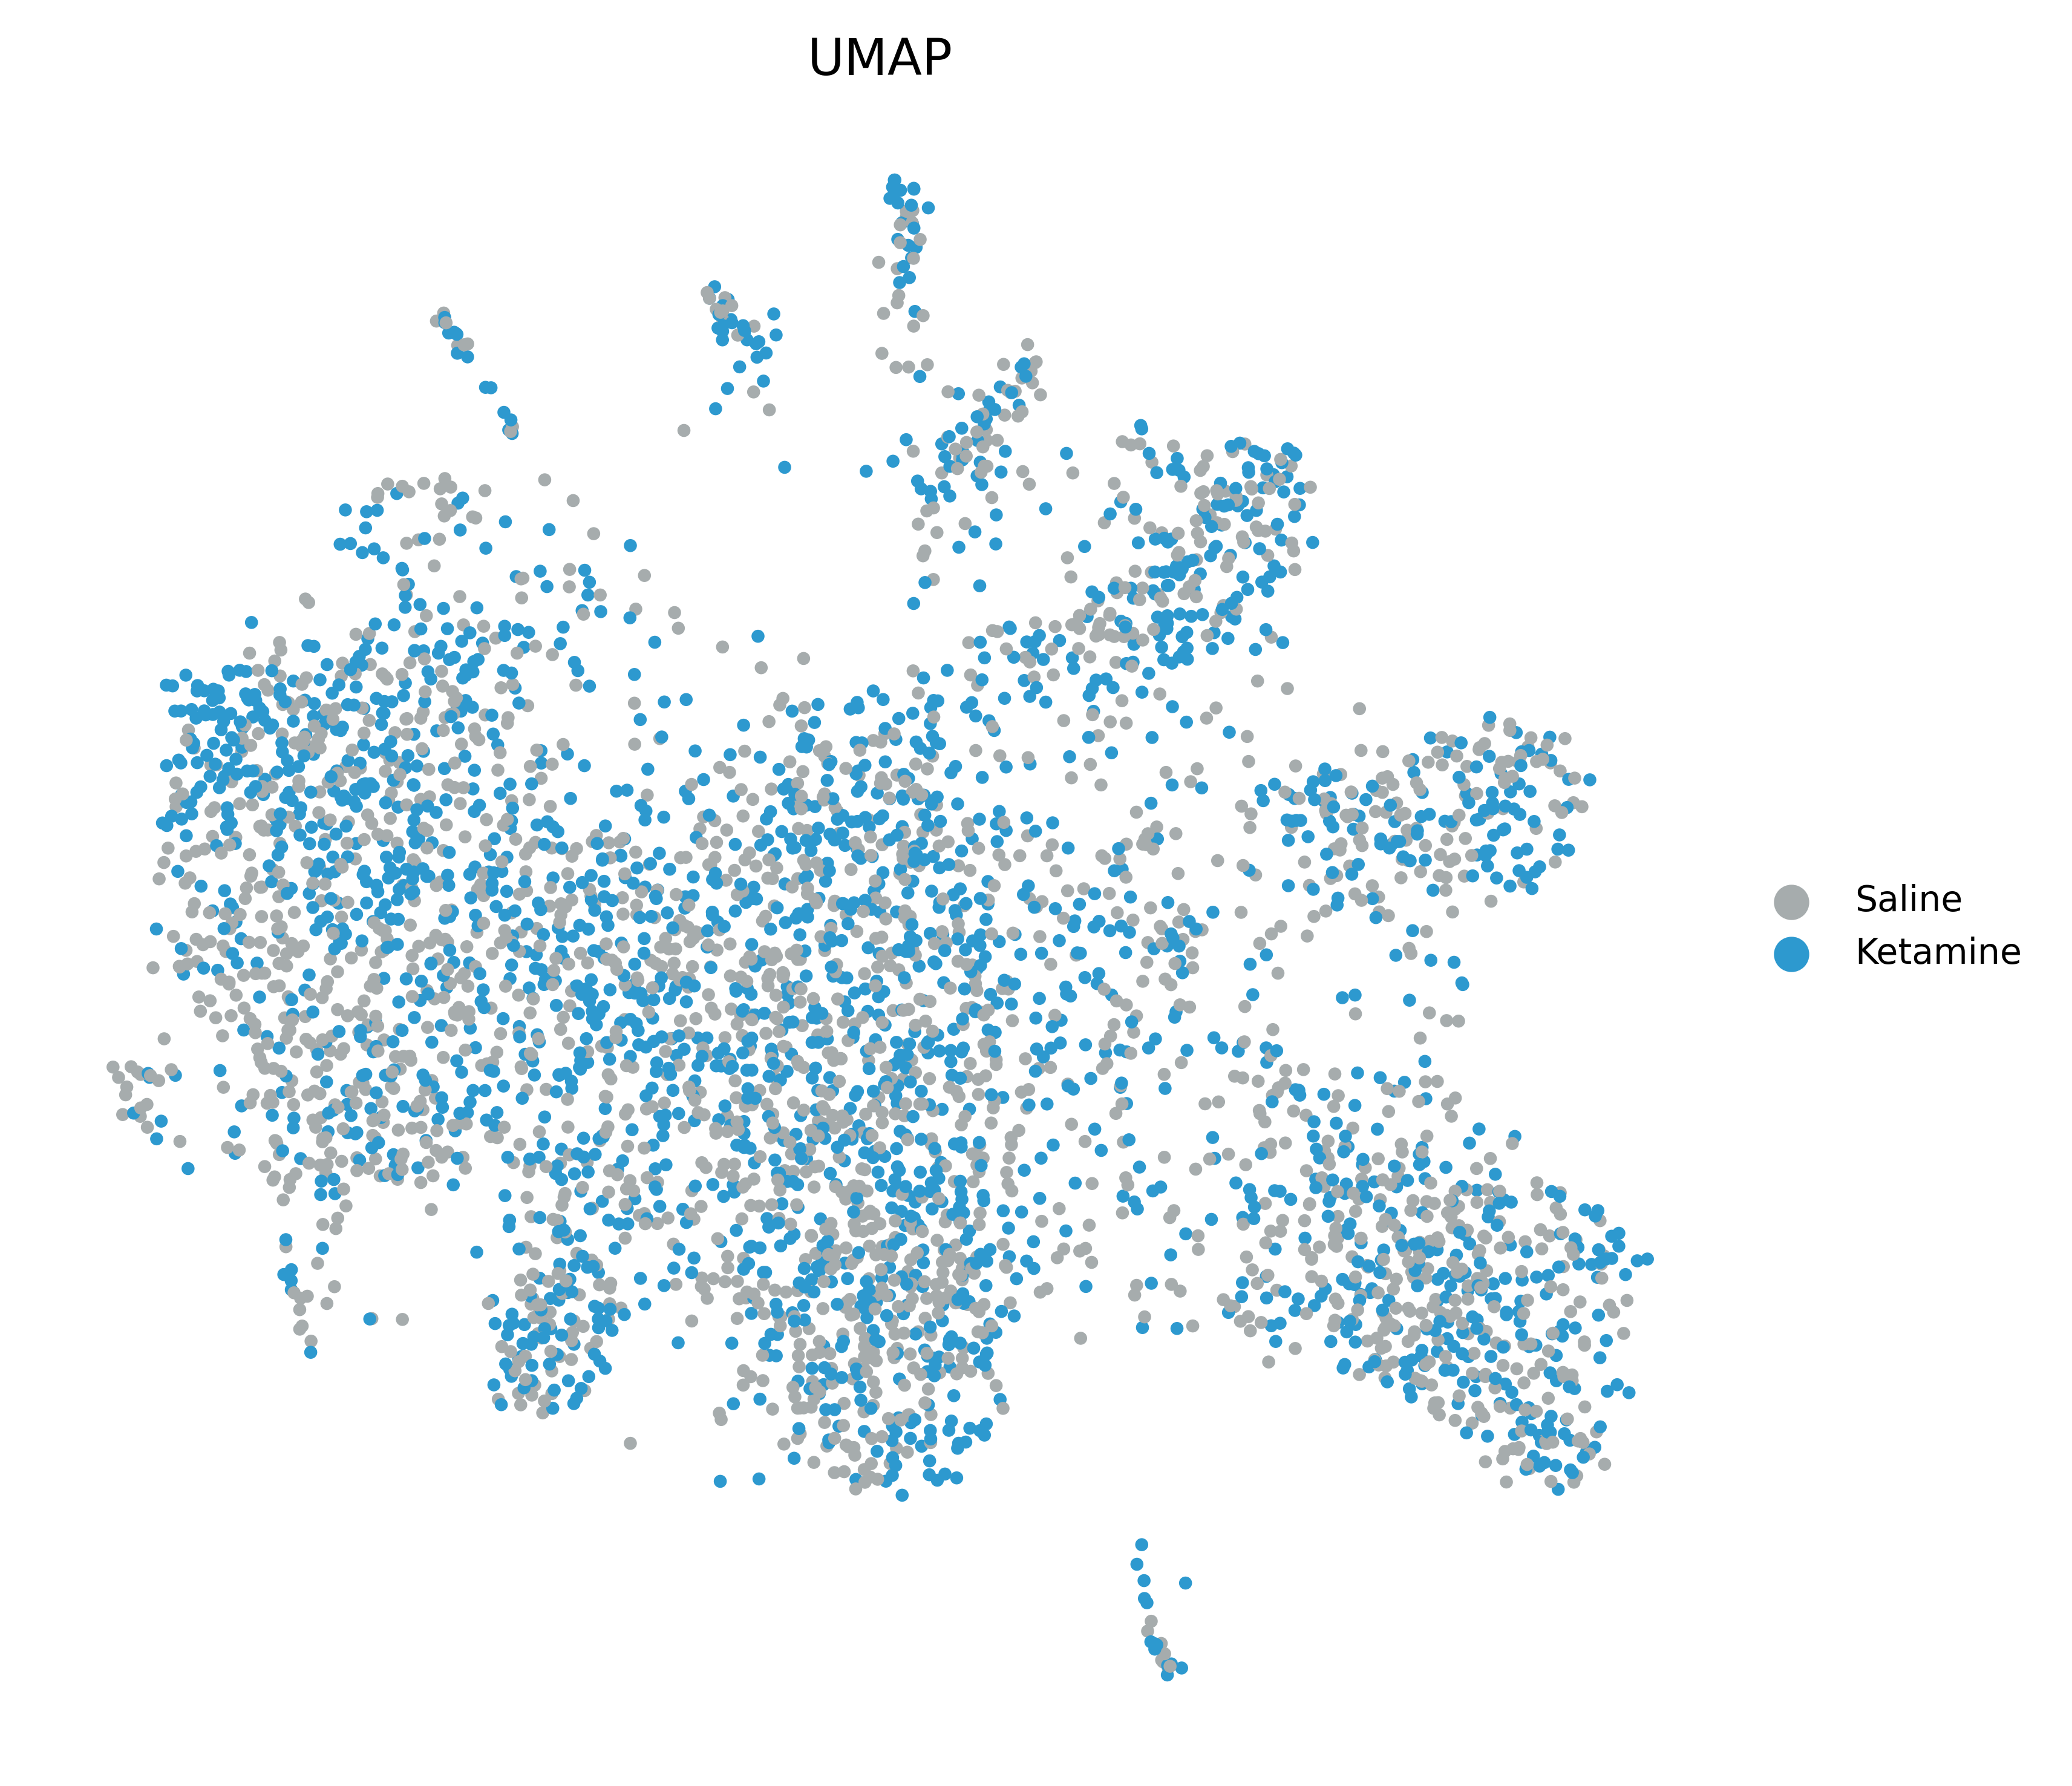

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sc.pl.umap(
    adata[~adata.obs.louvain_final.str.contains('Unknown')],
    color='condition_cat',
    palette=['#a6acad', '#2d99cf'],
    frameon=False,
    show=False,
    ax=ax
)
sns.despine()
ax.set_title('UMAP')

Trying to set attribute `.uns` of view, copying.


Text(0.5, 1.0, 'TSNE')

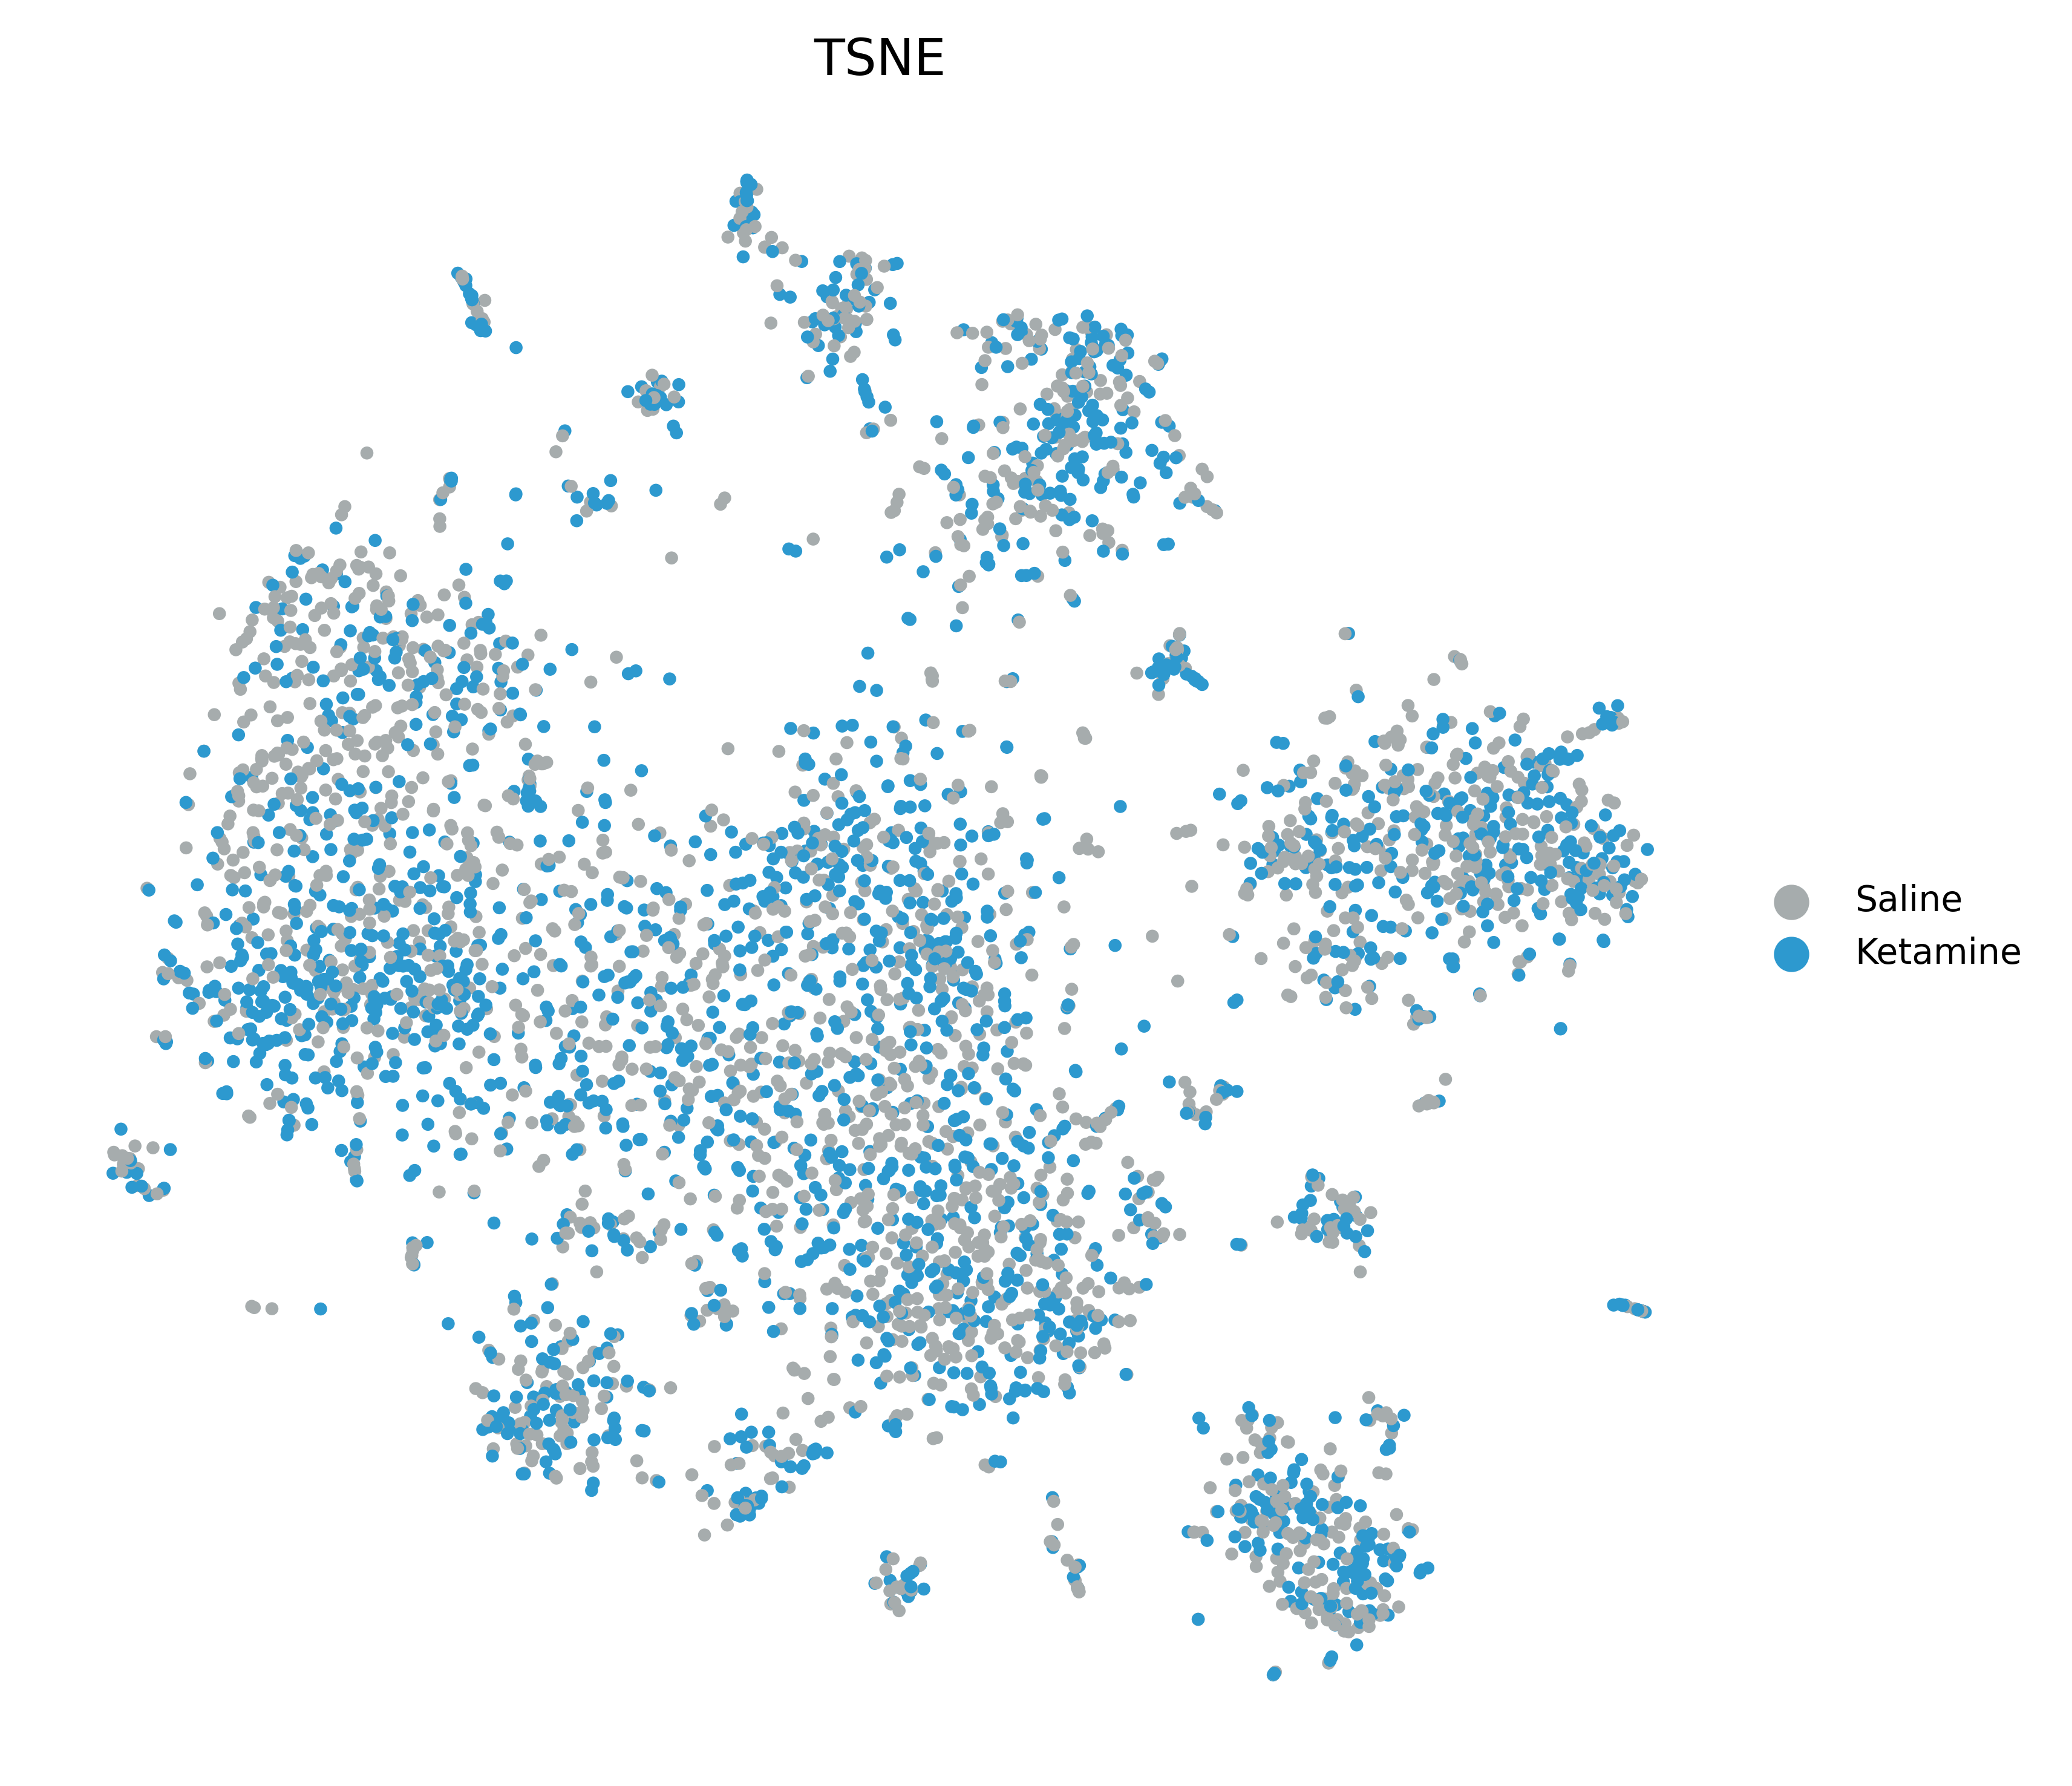

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sc.pl.tsne(
    adata[~adata.obs.louvain_final.str.contains('Unknown')],
    color='condition_cat',
    palette=['#a6acad', '#2d99cf'],
    frameon=False,
    show=False,
    ax=ax
)
sns.despine()
ax.set_title('TSNE')

# Violins

In [10]:
adata_full.obs['condition_cat'] = adata.obs.condition_cat.copy()

In [13]:
adata_full.var_names

Index(['ENSMUSG00000090750.1', 'ENSMUSG00000067203.7', 'ENSMUSG00000111741.1',
       'ENSMUSG00000104240.1', 'ENSMUSG00000085867.1', 'ENSMUSG00000061331.5',
       'ENSMUSG00000104058.1', 'ENSMUSG00000080999.1', 'ENSMUSG00000093774.1',
       'ENSMUSG00000095457.3',
       ...
       'ENSMUSG00000062458.5', 'ENSMUSG00000113848.1', 'ENSMUSG00000108240.1',
       'ENSMUSG00000081719.1', 'ENSMUSG00000029068.16', 'ENSMUSG00000084239.1',
       'ENSMUSG00000024968.13', 'ENSMUSG00000021807.5', 'ENSMUSG00000074506.4',
       'ENSMUSG00000103993.1'],
      dtype='object', length=20670)

/app/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Condition')

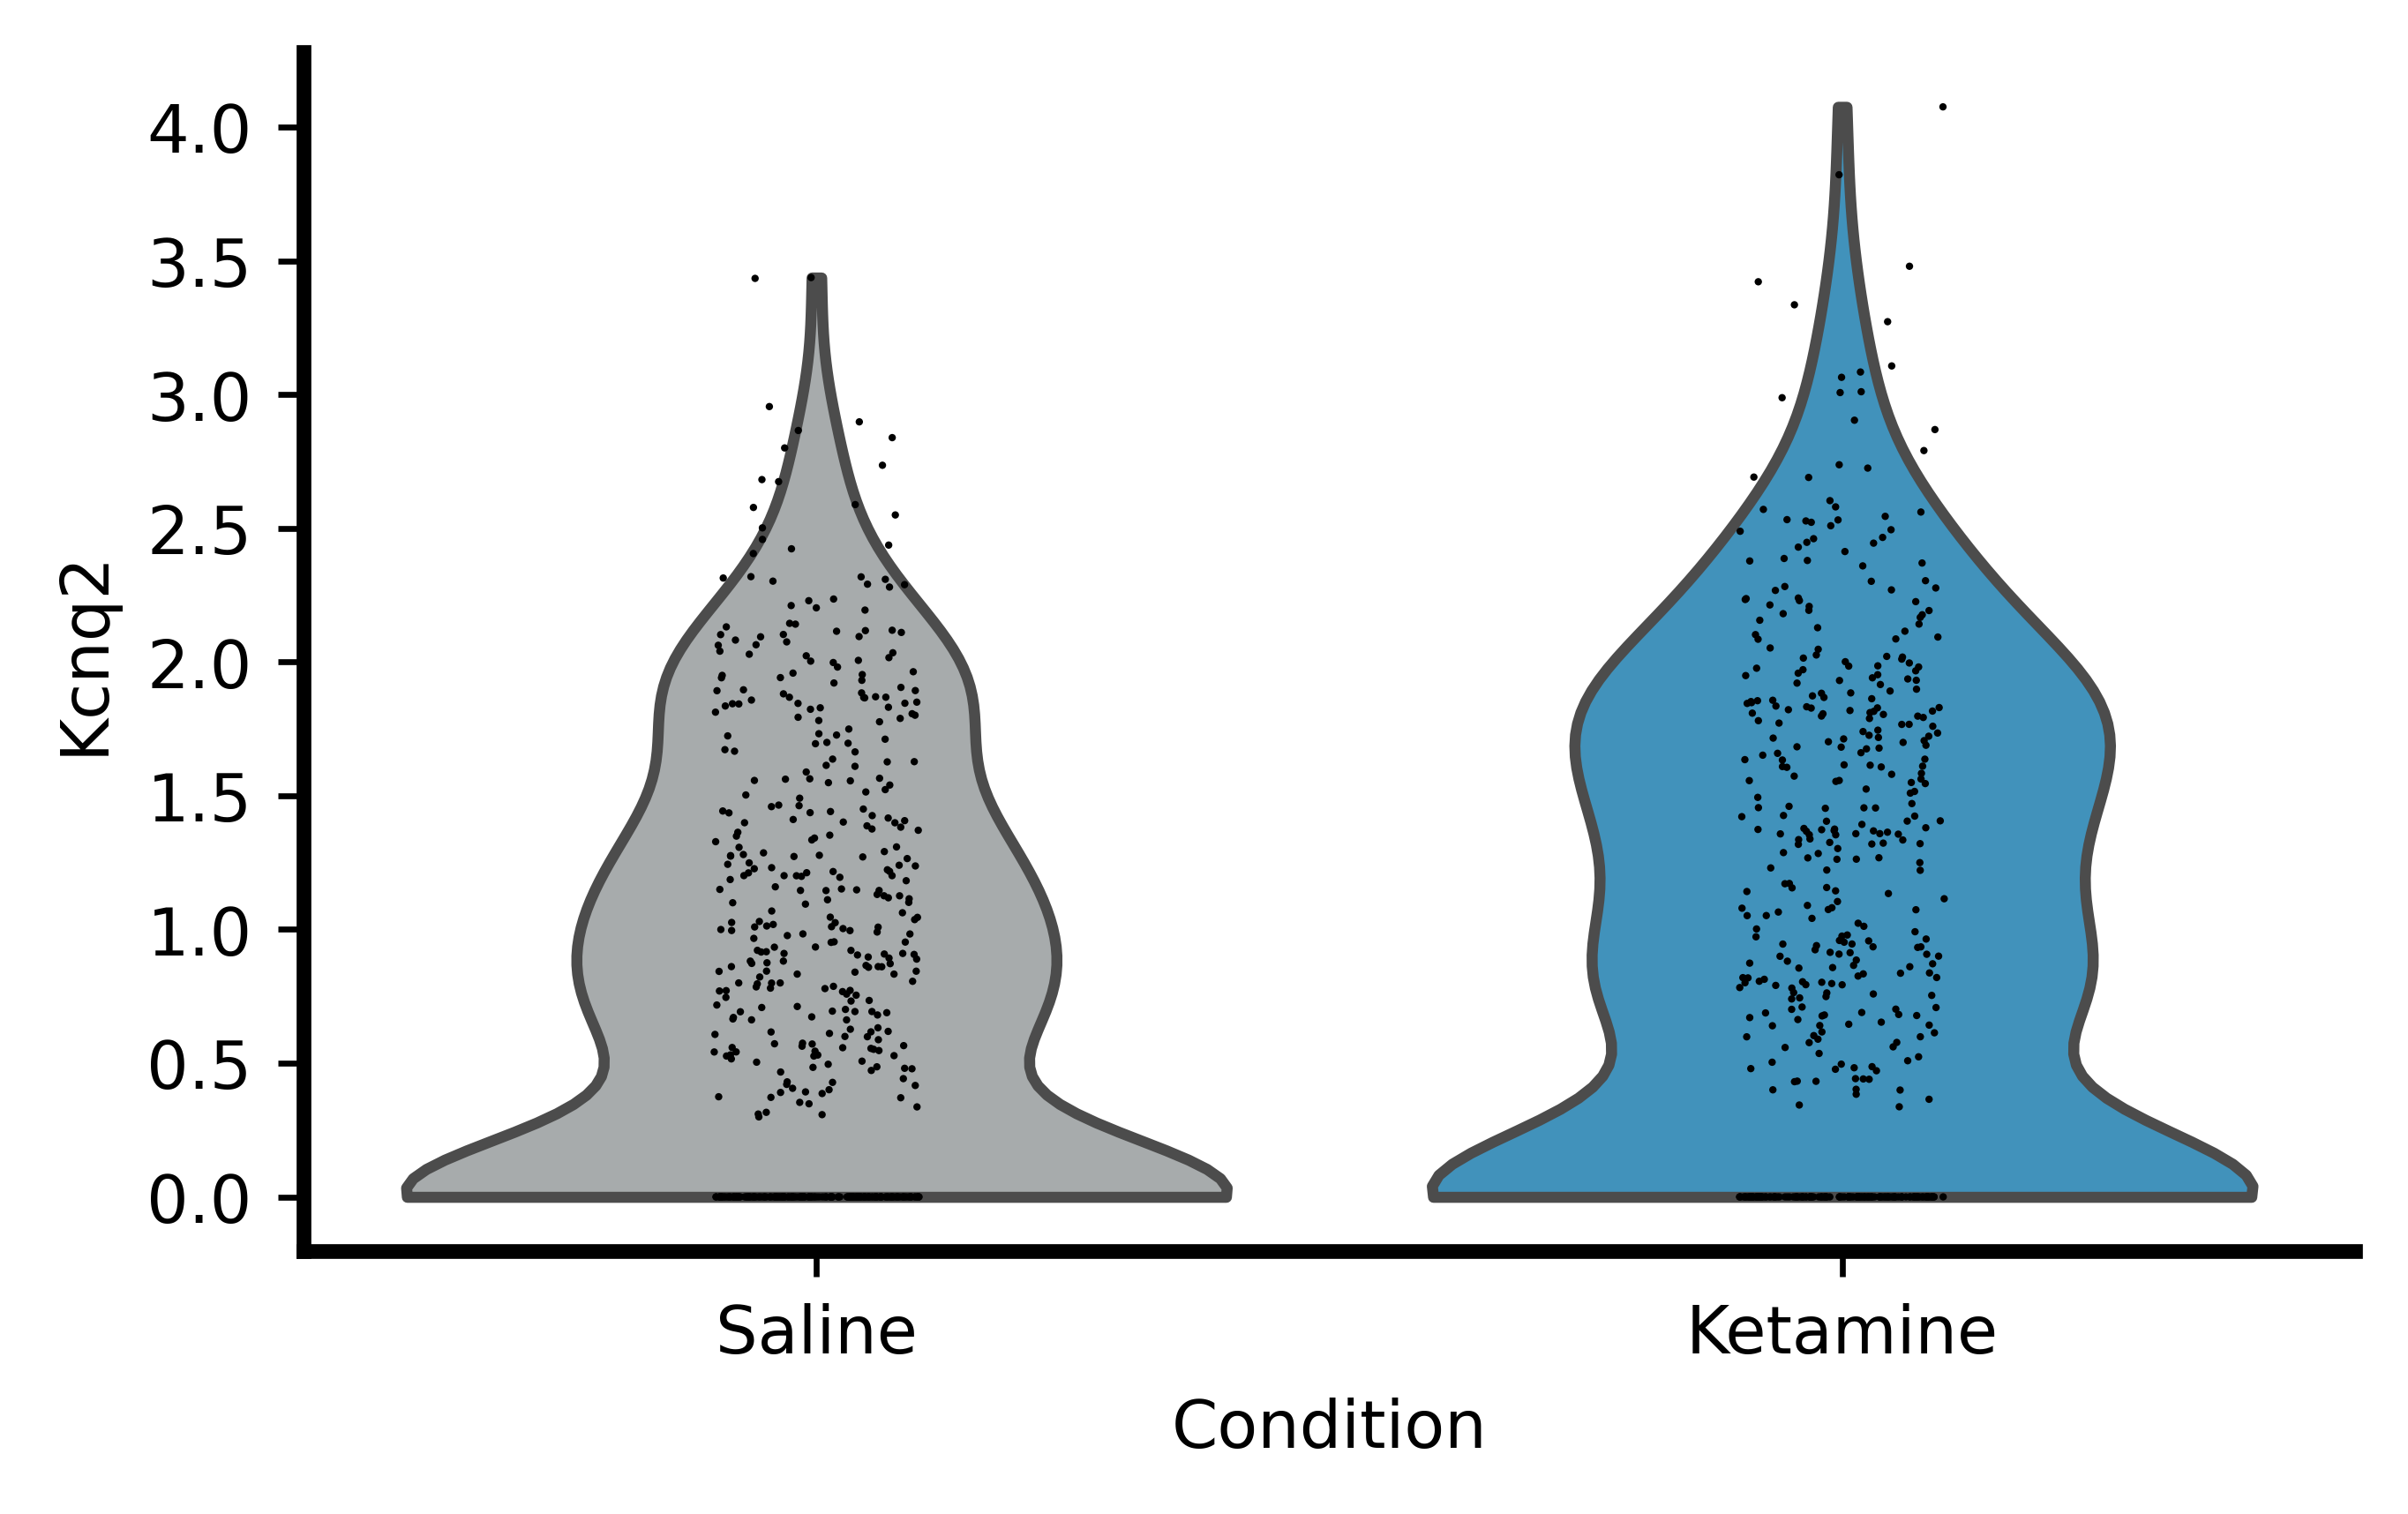

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
sc.pl.violin(
    adata_full[adata_full.obs.louvain_final == 'Glut Neurons'], 
    groupby='condition_cat', 
    keys='ENSMUSG00000016346.17', 
    palette=['#a6acad', '#2d99cf'],
    show=False,
    ax=ax,
)
sns.despine()
ax.set_ylabel('Kcnq2')
ax.set_xlabel('Condition')

/app/python37/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/app/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/app/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Condition')

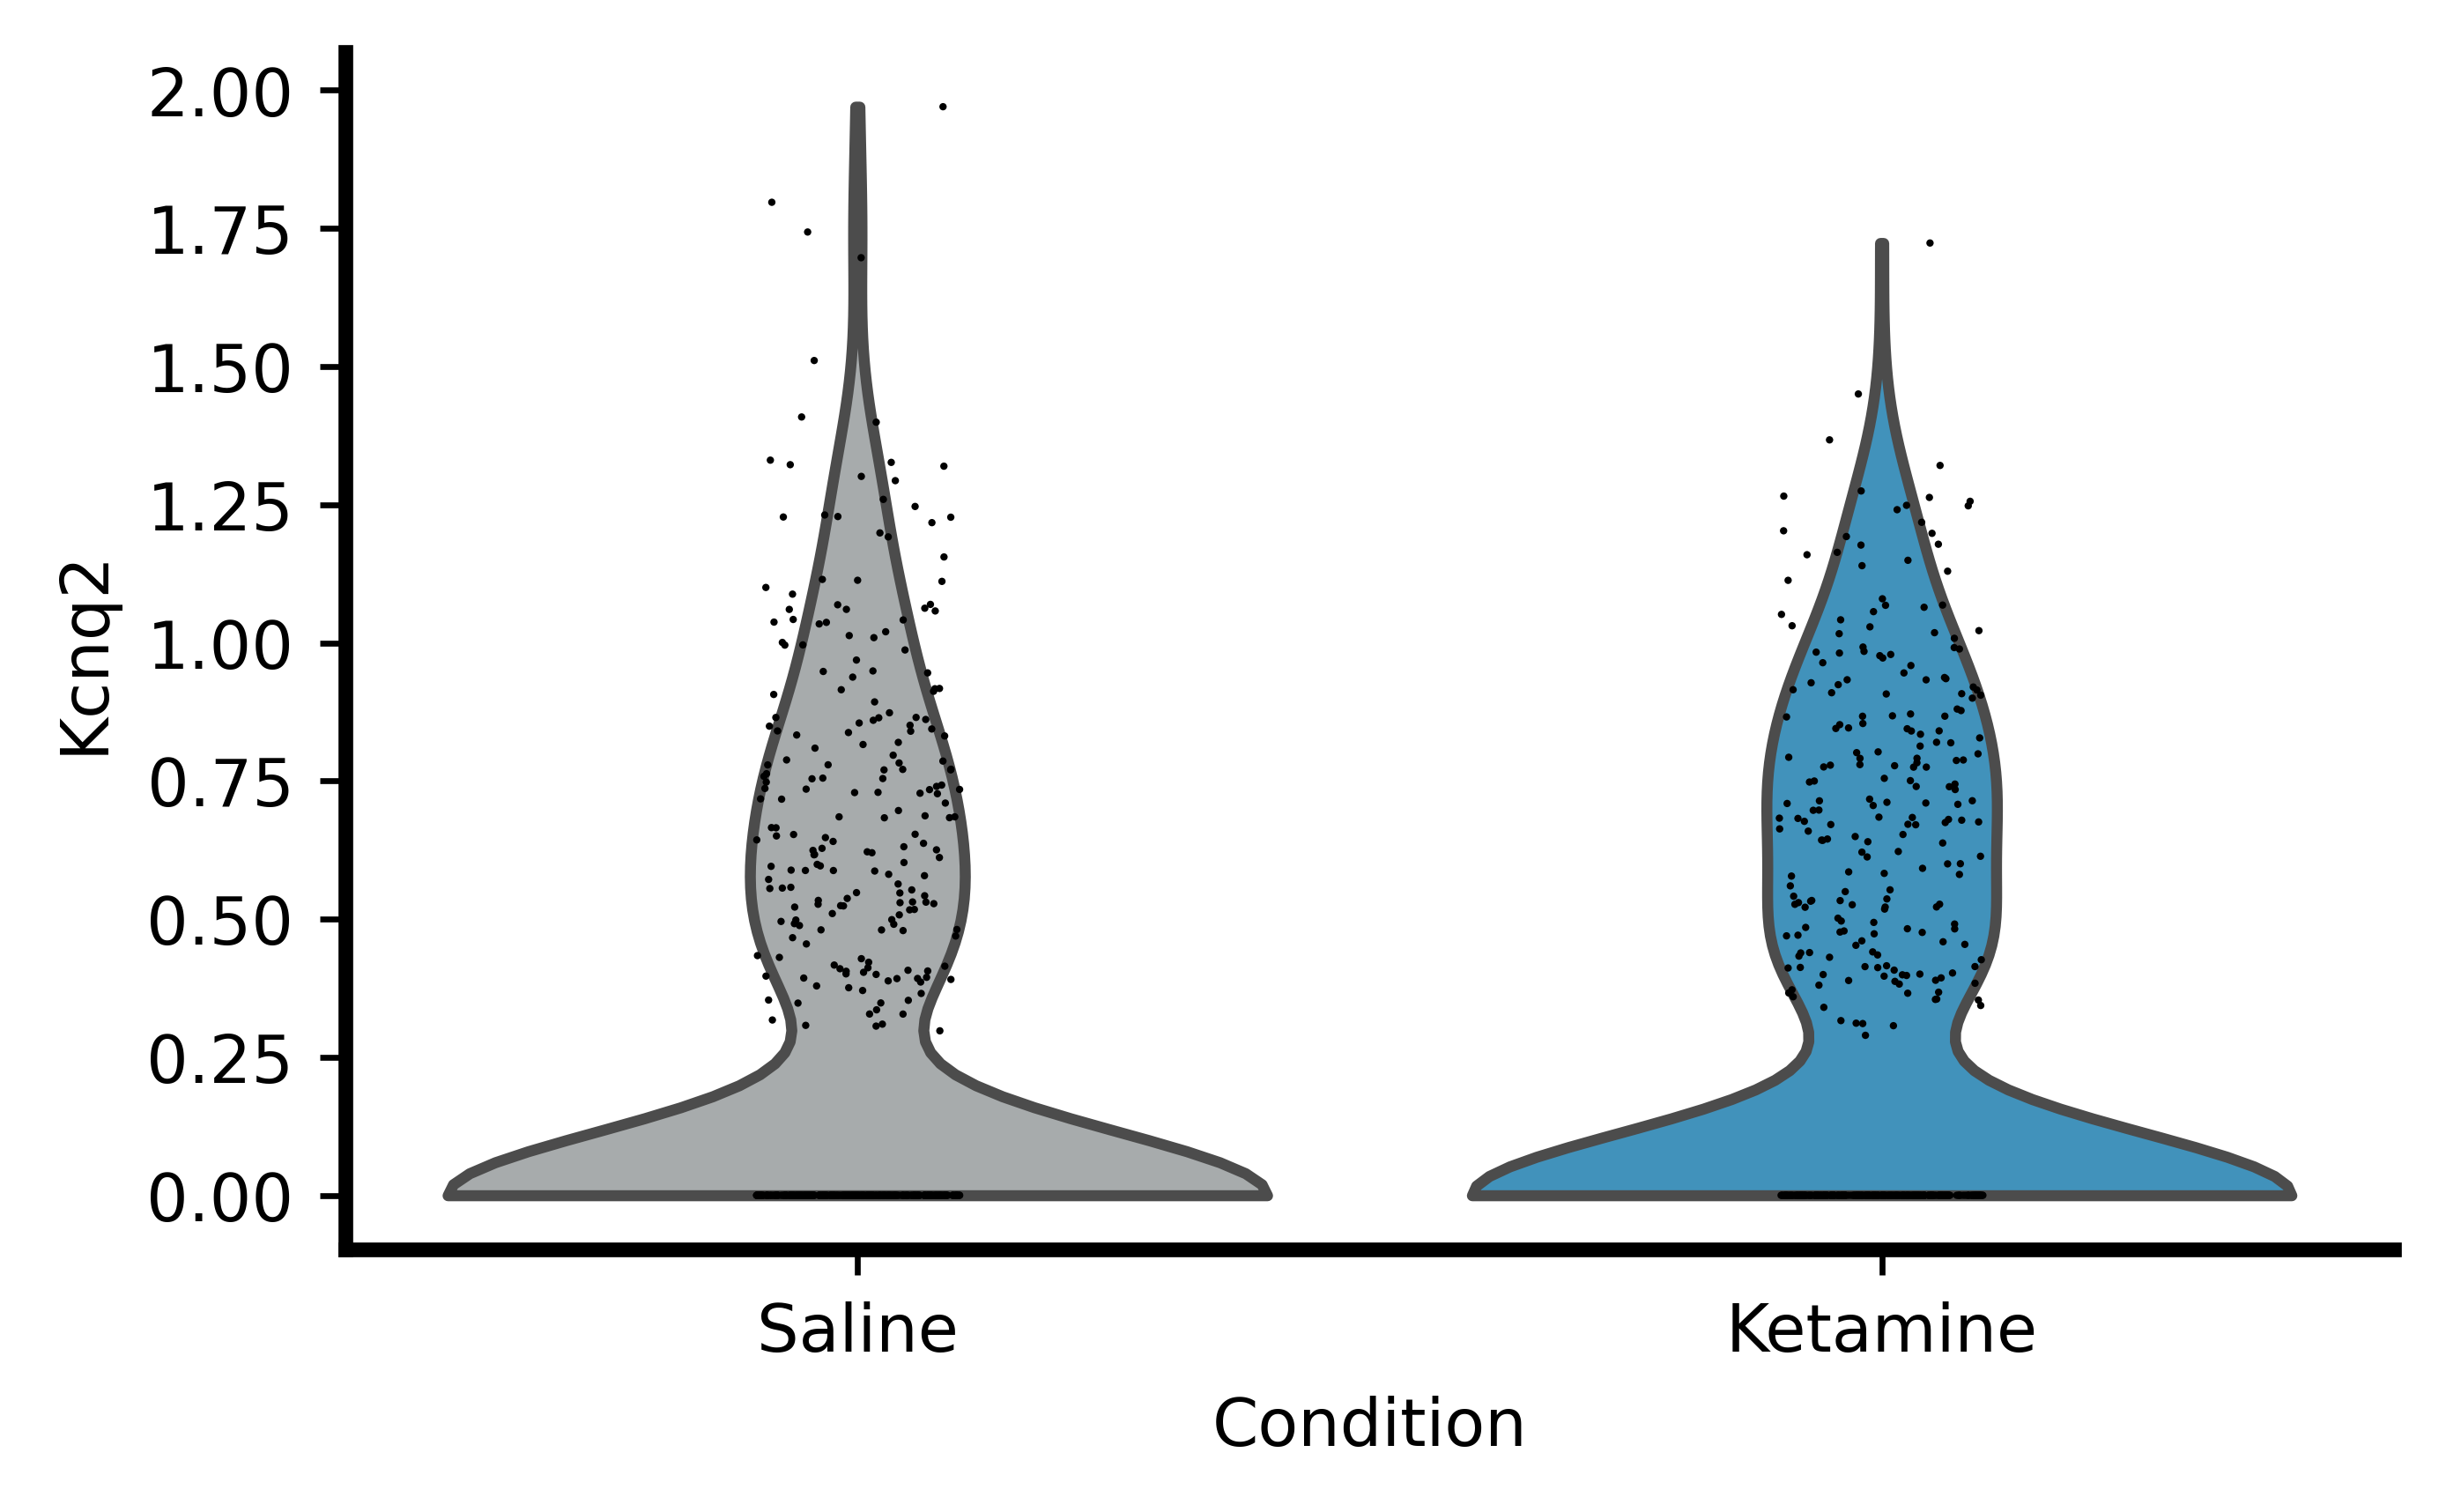

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
sc.pl.violin(
    adata_full[adata_full.obs.louvain_final == 'Glut Neurons'], 
    groupby='condition_cat', 
    keys='ENSMUSG00000056258.8', 
    palette=['#a6acad', '#2d99cf'],
    show=False,
    ax=ax,
)
sns.despine()
ax.set_ylabel('Kcnq2')
ax.set_xlabel('Condition')

# Dotplot

In [16]:
adata.var_names = adata.var.gene_symbols.copy()
adata_full.var_names = adata_full.var.gene_symbols.copy()

In [17]:
adata.var_names

CategoricalIndex(['Hba-ps4', 'Gm10275', 'Gm4691', '6330549D23Rik', 'Zfa-ps',
                  'Gm10653', 'Zfat', 'Tcof1', 'Cyb561d1', 'Ergic1',
                  ...
                  'Ippk', 'Capza1', 'Kcnk13', 'ENSMUSG00000110900.1', 'Atp5g3',
                  'Chfr', 'Slc25a44', 'Slain1', 'Isca2', 'Ccnl2'],
                 categories=['0610010F05Rik', '0610010K14Rik', '0610037L13Rik', '1110004E09Rik', '1110004F10Rik', '1110008F13Rik', '1110008L16Rik', '1110017D15Rik', ...], ordered=False, name='gene_symbols', dtype='category', length=5298)

/app/python37/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


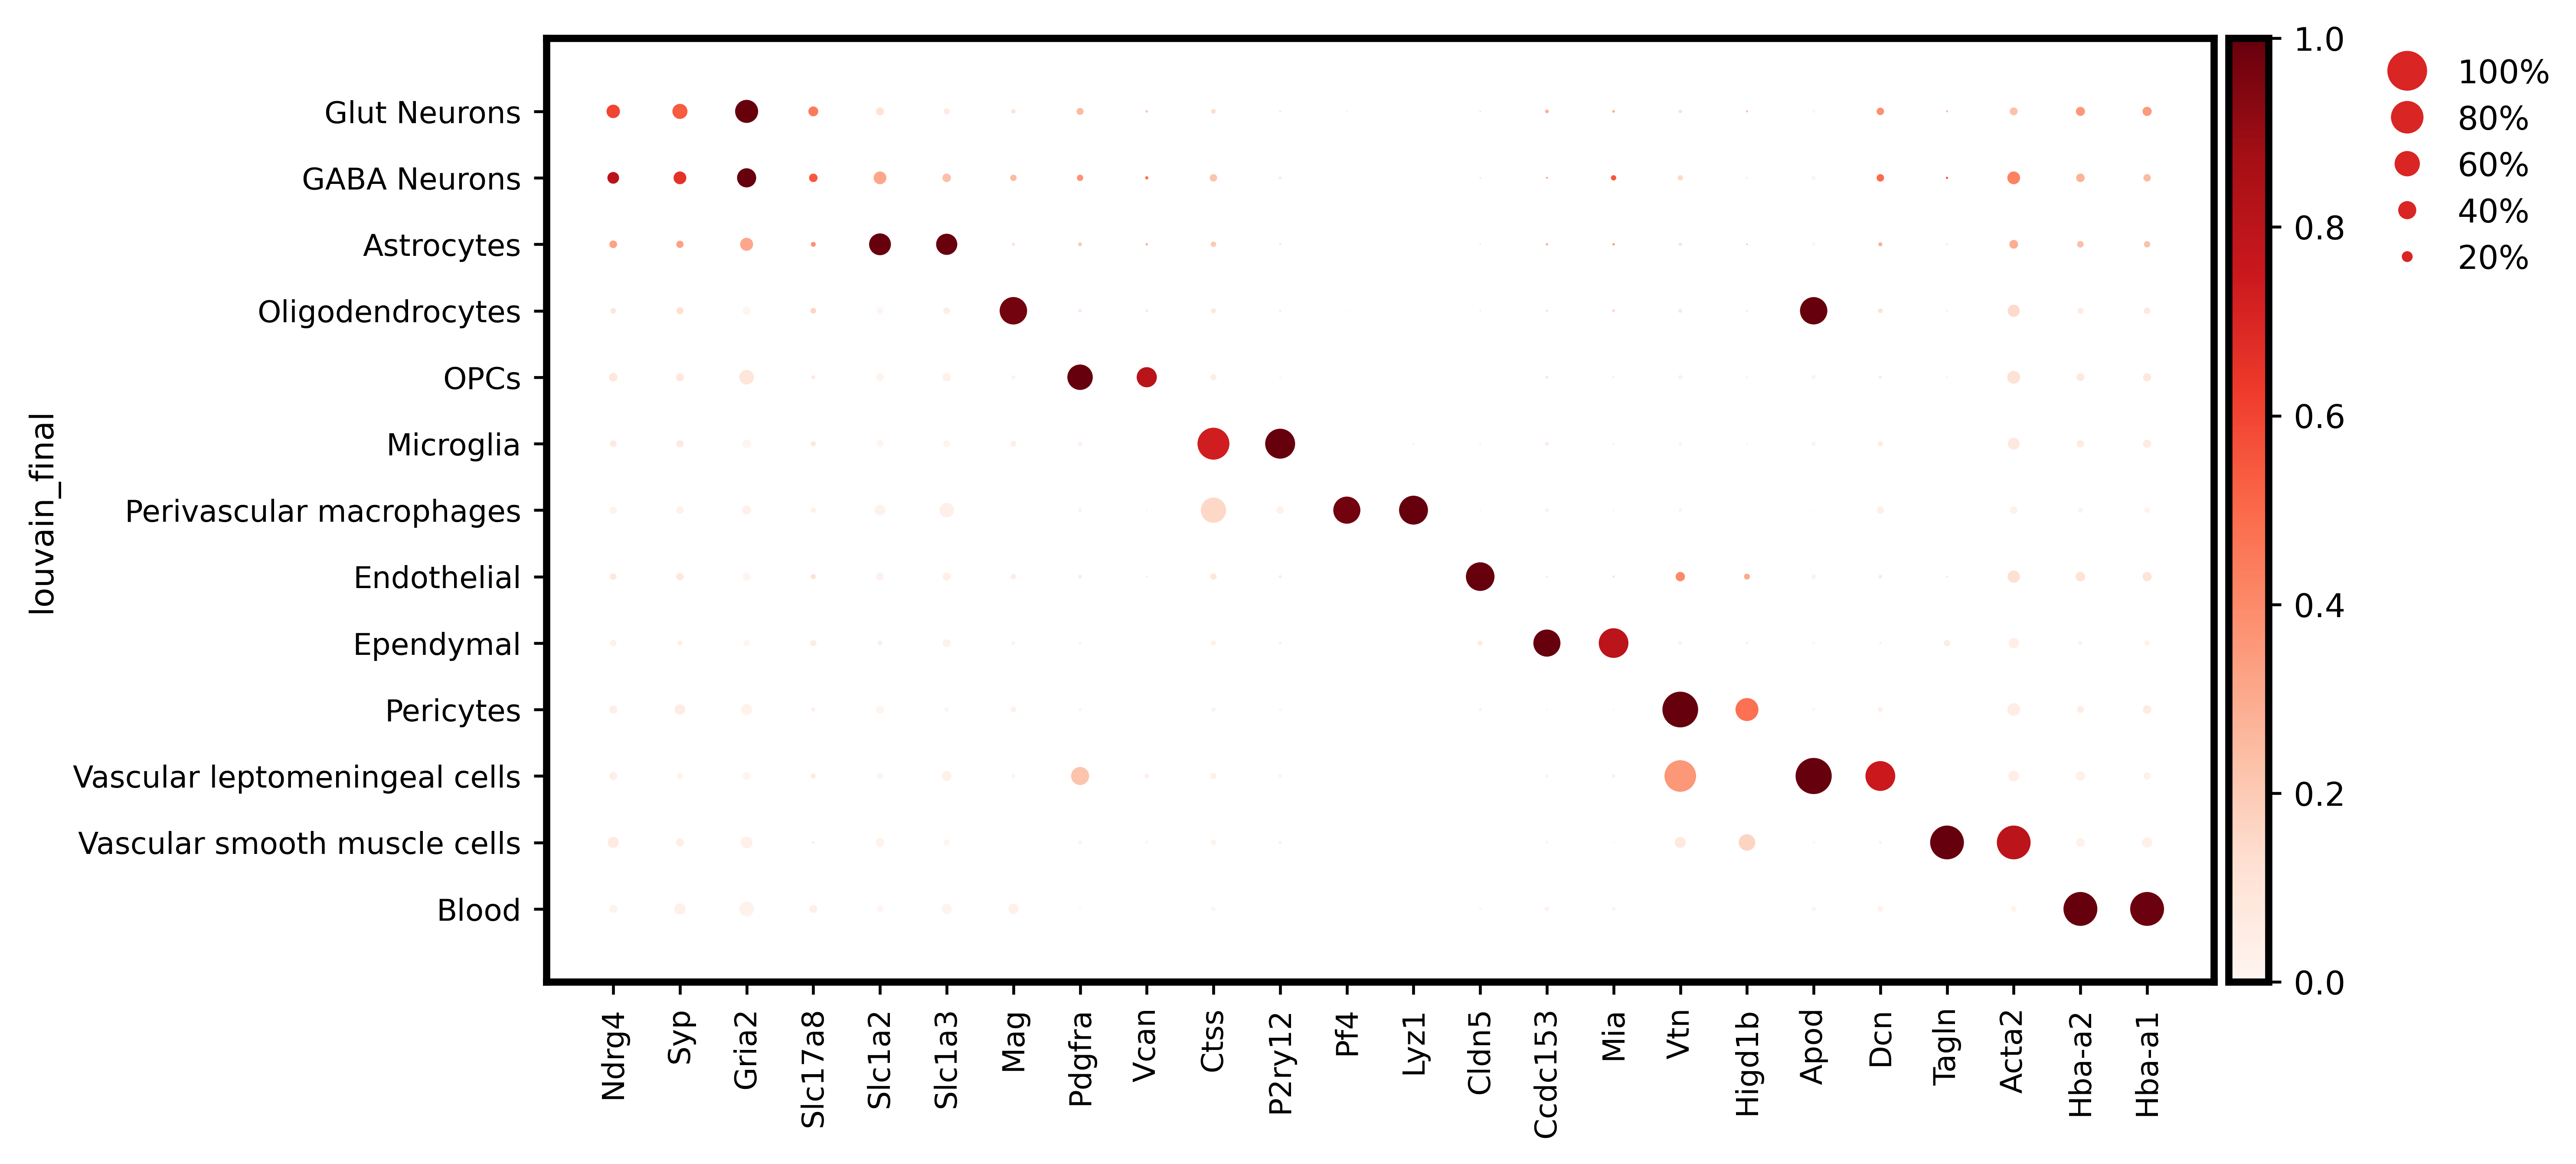

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[8.399999999999999, 0, 0.2, 0.5, 0.25])

In [18]:
sc.pl.dotplot(
    adata_full[~adata_full.obs.louvain_final.str.contains('Unknown')],
    groupby='louvain_final',
    var_names=[
        'Ndrg4',
        'Syp',
        'Gria2',
        'Slc17a8',
        'Slc1a2',
        'Slc1a3',
        'Mag',
        'Pdgfra',
        'Vcan',
        'Ctss',
        'P2ry12',
        'Pf4',
        'Lyz1',
        'Cldn5',
        'Ccdc153',
        'Mia',
        'Vtn',
        'Higd1b',
        'Apod',
        'Dcn',
        'Tagln',
        'Acta2',
        'Hba-a2',
        'Hba-a1'
    ],
    use_raw=False,
    standard_scale='group',
)

# QC

In [22]:
adata_qc = sc.read('./data/Ketamine_Single_Cell/Ketamine_full_counts_noqc_prescran_nb_final.h5ad')

In [23]:
adata_qc.obs

sample    chip  condition chip_pair  \
C92579_CELL_0_10_8Yellow_AACCTTCGACT  8Yellow  C92579       True         8   
C92579_CELL_0_14_8Blue_AACCAATCTCT      8Blue  C92579      False         8   
C92579_CELL_0_16_8Blue_AACCAACTAGA      8Blue  C92579      False         8   
C92579_CELL_0_17_8Blue_AACCAAGATTC      8Blue  C92579      False         8   
C92579_CELL_0_19_8Blue_AACCAATATAG      8Blue  C92579      False         8   
...                                       ...     ...        ...       ...   
C93411_CELL_9_61_8Yellow_AACTGACTATG  8Yellow  C93411       True         8   
C93411_CELL_9_66_8Yellow_AACTCTTGGAG  8Yellow  C93411       True         8   
C93411_CELL_9_70_8Yellow_AACTCTCAAGC  8Yellow  C93411       True         8   
C93411_CELL_9_71_8Yellow_AACTCTGCGTA  8Yellow  C93411       True         8   
C93411_CELL_9_8_8Blue_AAGAGAGCTCT       8Blue  C93411      False         8   

                                      candidate          microscopy_state  \
C92579_CELL_0_10_8Yellow_AACCTTCGACT       True                      Good   
C92579_CELL_0_14_8Blue_AACCAATCTCT         True                      Good   
C92579_CELL_0_16_8Blue_AACCAACTAGA         True                      Good   
C92579_CELL_0_17_8Blue_AACCAAGATTC        False  ManualUse, LowConfidence   
C92579_CELL_0_19_8Blue_AACCAATATAG         True                      Good   
...                                         ...                       ...   
C93411_CELL_9_61_8Yellow_AACTGACTATG      False   ManualUse, HasDeadCells   
C93411_CELL_9_66_8Yellow_AACTCTTGGAG       True                      Good   
C93411_CELL_9_70_8Yellow_AACTCTCAAGC       True                      Good   
C93411_CELL_9_71_8Yellow_AACTCTGCGTA       True                      Good   
C93411_CELL_9_8_8Blue_AAGAGAGCTCT          True                      Good   

                                      quality_signal  damage_signal  \
C92579_CELL_0_10_8Yellow_AACCTTCGACT           316.0            0.0   
C92579_CELL_0_14_8Blue_AACCAATCTCT             352.0            0.0   
C92579_CELL_0_16_8Blue_AACCAACTAGA             497.0            0.0   
C92579_CELL_0_17_8Blue_AACCAAGATTC             273.0            0.0   
C92579_CELL_0_19_8Blue_AACCAATATAG             404.0            0.0   
...                                              ...            ...   
C93411_CELL_9_61_8Yellow_AACTGACTATG          1253.0          171.0   
C93411_CELL_9_66_8Yellow_AACTCTTGGAG           461.0            0.0   
C93411_CELL_9_70_8Yellow_AACTCTCAAGC           959.0            0.0   
C93411_CELL_9_71_8Yellow_AACTCTGCGTA           416.0            0.0   
C93411_CELL_9_8_8Blue_AAGAGAGCTCT              291.0            0.0   

                                      count_depth  n_genes   mt_frac  
C92579_CELL_0_10_8Yellow_AACCTTCGACT       6509.0     2237  0.006760  
C92579_CELL_0_14_8Blue_AACCAATCTCT         2641.0     1132  0.005680  
C92579_CELL_0_16_8Blue_AACCAACTAGA         5397.0     2437  0.013711  
C92579_CELL_0_17_8Blue_AACCAAGATTC        40720.0     7236  0.004396  
C92579_CELL_0_19_8Blue_AACCAATATAG         7697.0     2255  0.003248  
...                                           ...      ...       ...  
C93411_CELL_9_61_8Yellow_AACTGACTATG       3163.0     1588  0.018021  
C93411_CELL_9_66_8Yellow_AACTCTTGGAG      17206.0     5315  0.008427  
C93411_CELL_9_70_8Yellow_AACTCTCAAGC      11817.0     4129  0.006770  
C93411_CELL_9_71_8Yellow_AACTCTGCGTA      16671.0     4661  0.020875  
C93411_CELL_9_8_8Blue_AAGAGAGCTCT          9119.0     2905  0.004935  

[5725 rows x 11 columns]

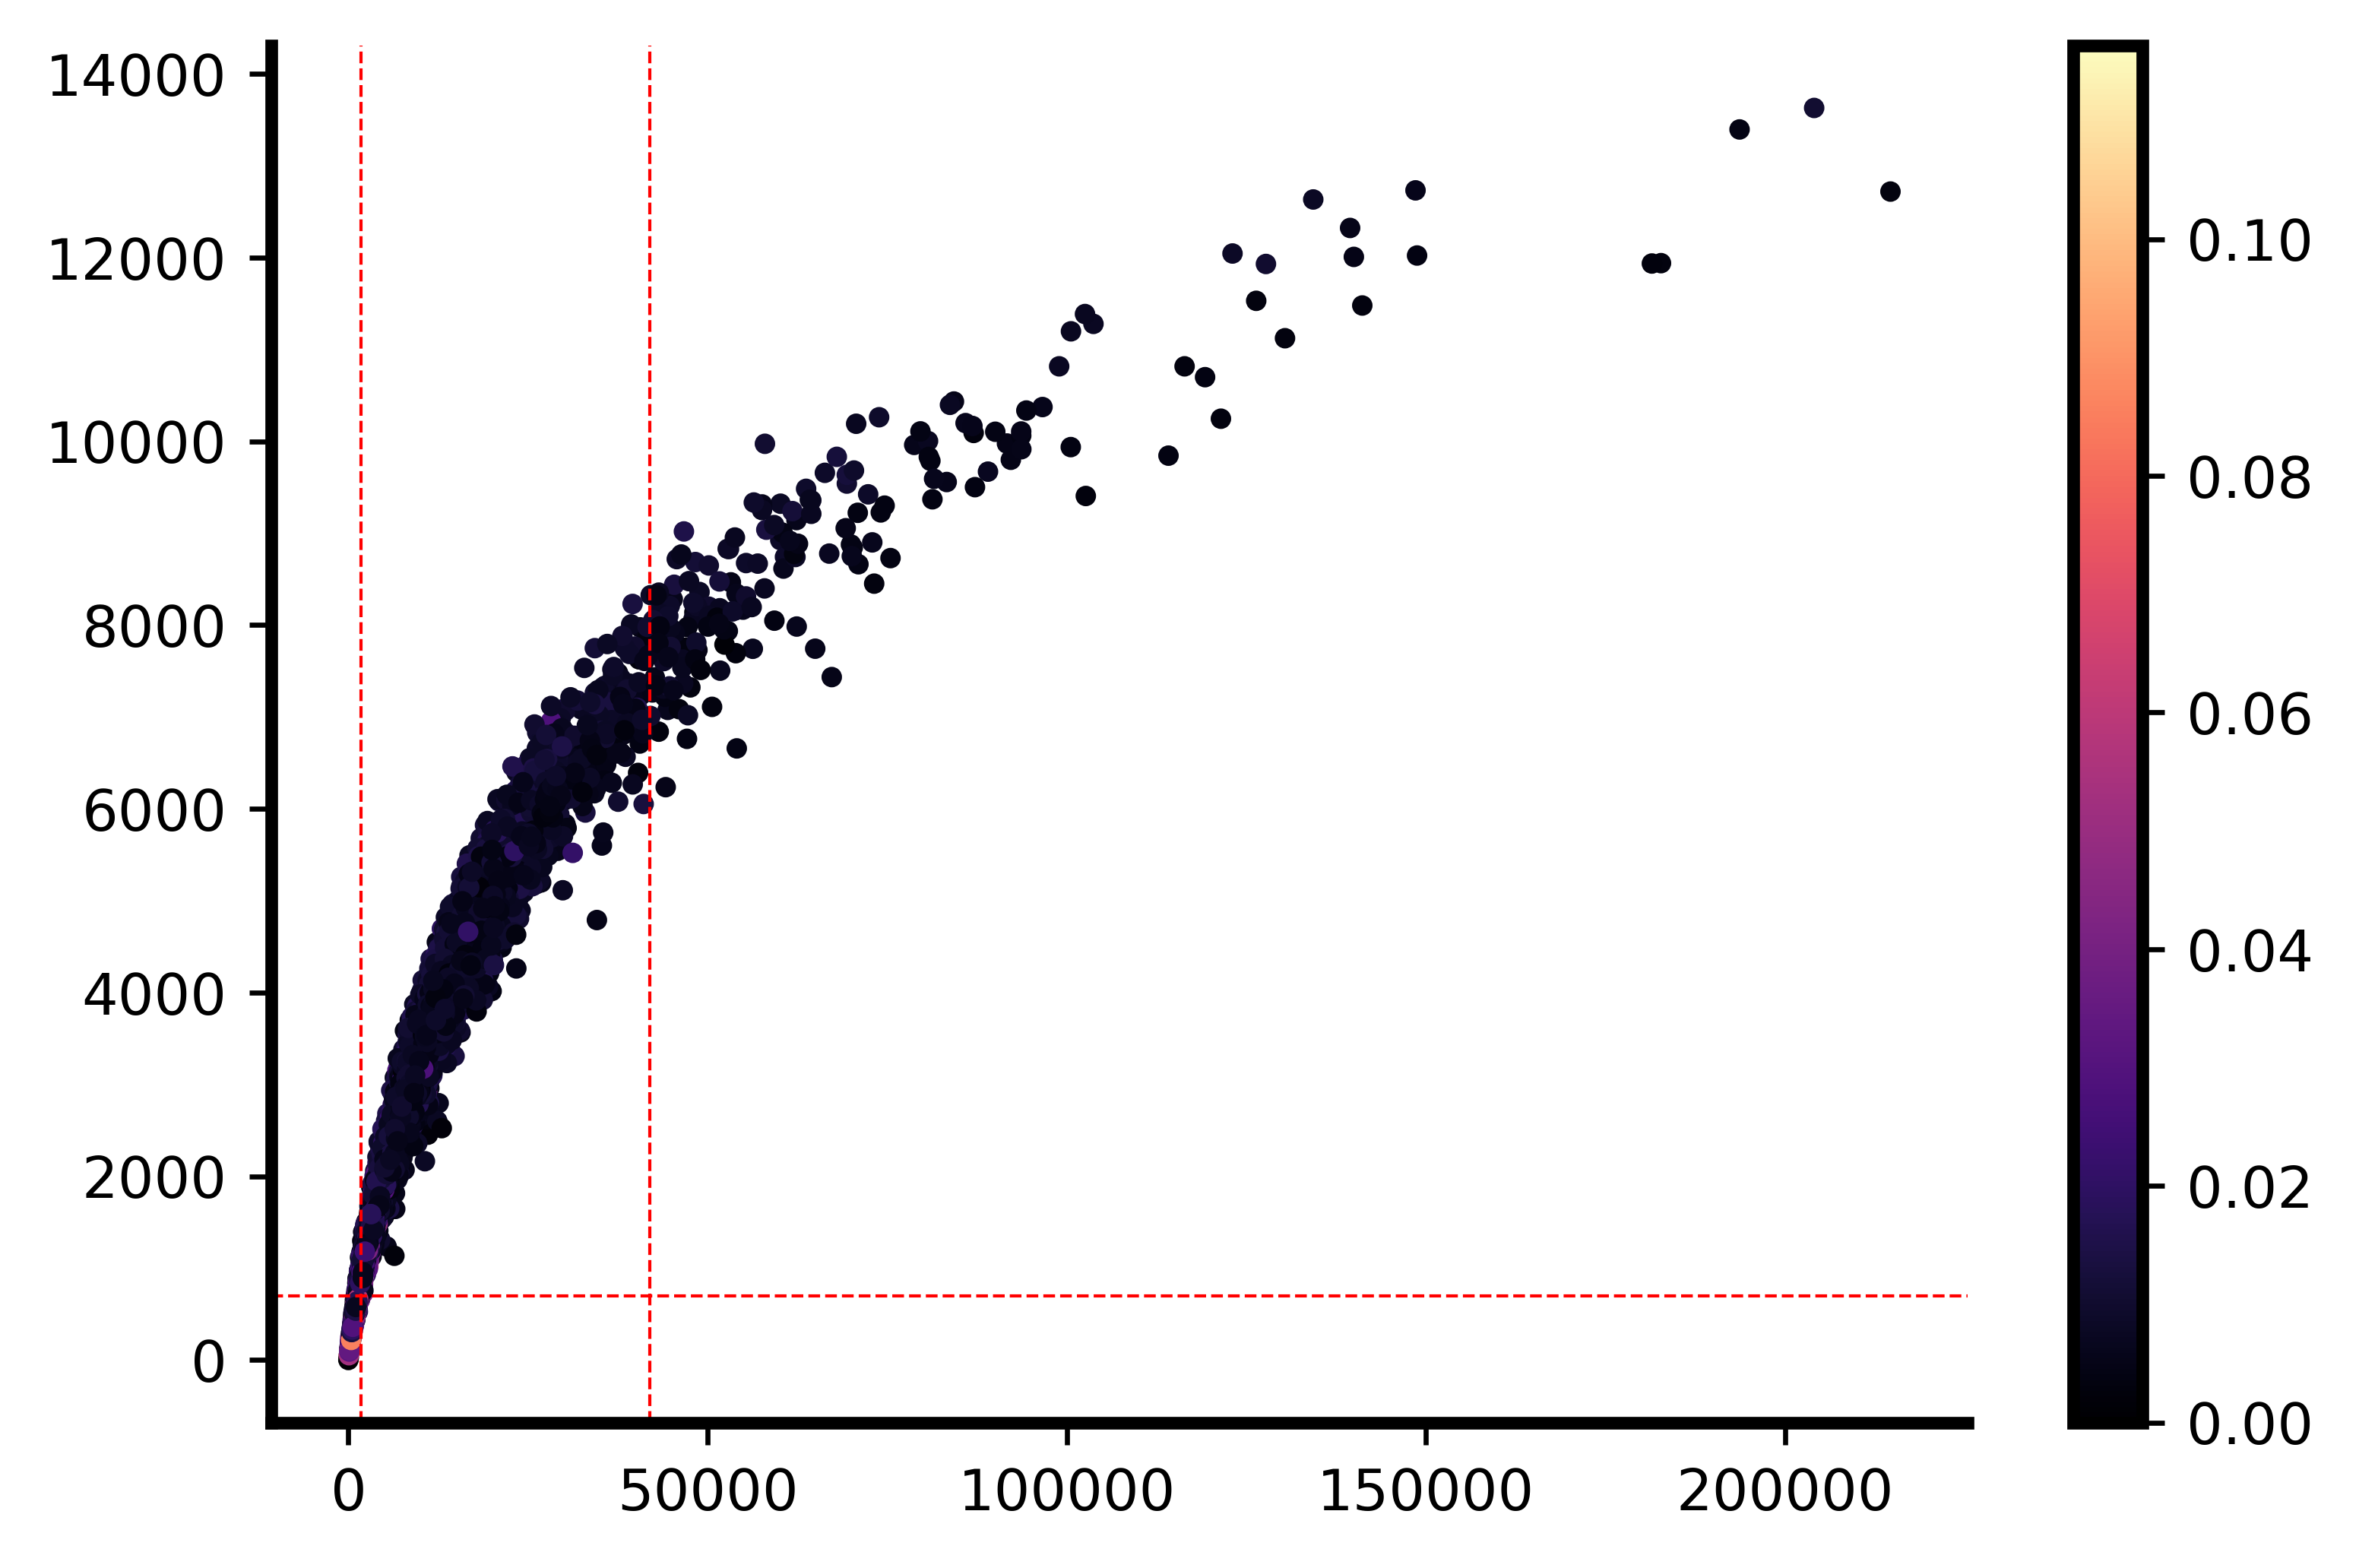

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
p = ax.scatter(adata_qc.obs['count_depth'], adata_qc.obs['n_genes'], c=adata_qc.obs['mt_frac'], s=5, cmap='magma')
ax.axhline(700, c='red', linestyle='--', linewidth=0.5)
ax.axvline(1750, c='red', linestyle='--', linewidth=0.5)
ax.axvline(42000, c='red', linestyle='--', linewidth=0.5)
sns.despine()
plt.colorbar(p)

# Table

In [20]:
sc.tl.rank_genes_groups(adata, groupby='louvain_final')

/app/python37/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


In [21]:
dfs = {}
for clust in adata.obs.louvain_final.cat.categories:
    dfs[clust] = pd.DataFrame(
        {
            'ensemble_id': adata.uns['rank_genes_groups']['names'][clust],
            'gene_symbols': adata.var.reindex(adata.uns['rank_genes_groups']['names'][clust])['gene_symbols'],
            'scores': adata.uns['rank_genes_groups']['scores'][clust],
            'pvals': adata.uns['rank_genes_groups']['pvals'][clust],
            'pvals_adj': adata.uns['rank_genes_groups']['pvals_adj'][clust],
        }
    )

ValueError: cannot reindex from a duplicate axis

In [ ]:
folder = './data/Ketamine_Single_Cell/markers/'
for clust in adata.obs.louvain_final.cat.categories:
    dfs[clust].to_csv(folder + clust + '.csv')